# 1. DATA EXPLORATION

## 1.1 Import and functions

In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# IMPORT AND FUNCTIONS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold   
from statistics import mean
import joblib 
#endregion

ModuleNotFoundError: No module named 'matplotlib'

## 1.2: Get the Data
### Load dataset into the Jupyter Notebook

### The dataset is data about car retails.

In [3]:
# In[2]: STEP 2. GET THE DATA (DONE). LOAD DATA
# Note: the path has to be edited corresponding to where it is on the local computer
raw_data = pd.read_csv(r'/Users/callysta/Documents/FoundOfAI/GroupAssignment/datasets/CarDetailsV3.csv')

## 1.3: DISCOVER THE DATA TO GAIN INSIGHTS
### 1.3.1: Quick view of data

In [4]:

# 3.1 Quick view of the data
print('\n____________ Dataset info ____________')
print(raw_data.info())      
print('\n____________ Some first data examples ____________')
print(raw_data.head(3)) 
print('\n____________ Counts on a feature ____________')
print(raw_data['fuel'].value_counts()) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())   
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,5,48], [2, 5]] ) # Refer using column ID
 


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None

____________ Some first data examples ____________
                           name  year  selling_price  km_driven    fuel 

### Our label data is selling_price with the datatype int64. 

### The main objective of this project:
is to predict the selling price of a car based on its conditions.

### Overview of the dataset
The table above shows that there are 8128 rows. However, there are some missing values in mileages, engine, max_power, torque, seats.

## 1.3.2: Scatter plot between 2 features
### Feature selections:
To approach this regression problem and focus on predicting the price, features that are suspected to have an impactful correlation raking from high to low:
1. The year the car was produced (year)
2. Kilometers Driven (km_driven)
3. Engine capacity (max_power)

NameError: name 'plt' is not defined

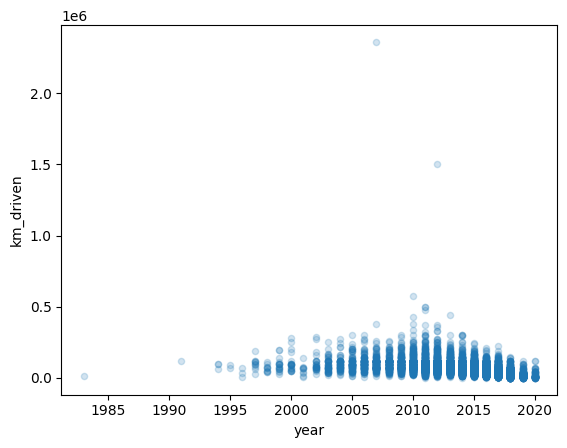

In [12]:

# 3.2 Scatter plot b/w 2 features
if 0:
    raw_data.plot(kind="scatter", y="km_driven", x="year", alpha=0.2)
    # plt.axis([min_year, max_year, min_price, max_price])  # Optional: Set axis limits if needed
    plt.savefig('figures/scatter_selling_price_year.png', format='png', dpi=300)
    plt.show()      
if 0:
    raw_data.plot(kind="scatter", y="selling_price", x="km_driven", alpha=0.2)
    # plt.axis([min_km_driven, max_km_driven, min_price, max_price])  # Optional: Set axis limits if needed
    plt.savefig('figures/scatter_selling_price_km_driven.png', format='png', dpi=300)
    plt.show()

# 3.3 Scatter plot b/w every pair of features
if 1:
    from pandas.plotting import scatter_matrix 
    features_to_plot = ["selling_price", "year", "km_driven", "max_power"]
    scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
    plt.savefig('figures/scatter_matrix_car_features.png', format='png', dpi=300)
    plt.show()

# # 3.4 Plot histogram of 1 feature
# if 1:
#     features_to_plot = ["selling_price"]
#     scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
#     plt.show()

# # 3.5 Plot histogram of numeric features
# if 1:
#     raw_data.hist(figsize=(10, 5)) #bins: no. of intervals
#     plt.rcParams['xtick.labelsize'] = 10
#     plt.rcParams['ytick.labelsize'] = 10
#     plt.tight_layout()
#     plt.savefig('figures/hist_car_data.png', format='png', dpi=300) # must save before show()
#     plt.show()

# # 3.6 Compute correlations b/w features
# corr_matrix = raw_data.corr(numeric_only=True)
# #print(corr_matrix) # print correlation matrix
# print('\n', corr_matrix["selling_price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

# # 3.7 Try combining features
# raw_data["price_per_km"] = raw_data["selling_price"] / raw_data["km_driven"]
# raw_data["price_per_hp"] = raw_data["selling_price"] / raw_data["max_power"].replace(" bhp", "", regex=True).astype(float)  # Ensure max_power is numeric
# corr_matrix = raw_data.corr(numeric_only=True)
# print(corr_matrix["selling_price"].sort_values(ascending=False)) # print correlation b/w a feature and other features
# raw_data.drop(columns=["price_per_km", "price_per_hp"], inplace=True) # remove experiment columns
